In [6]:
import numpy as np
import emcee
import matplotlib.pyplot as plt

In [75]:
class Inputs_Wrapper():
	# maybe: add a boolean list that toggles the sampling pf each parameter
	def __init__(self, parnames, pars, prior_bounds, model, data, x):
		self.npars = len(parnames)
		self.params = parnames
		self.prior_bounds = prior_bounds
		self.model = model
		self.data = data
		self.p0 = pars
		self.pars = pars
		self.x = x
	def logPrior(self):
		logP = 0
		for i in range(self.npars):
			if (self.pars[i] < self.prior_bounds[i][0]) | (self.pars[i] > self.prior_bounds[i][1]):
				logP = -np.inf
		return logP
	def logLikelihood(self):
		y0 = self.model(self.pars, self.x)
		chi2 = np.sum((y0 - self.data)**2)
		return -np.log(chi2/2)
	def logPosterior(self):
		return self.logPrior() + self.logLikelihood()
	def run(self, nwalkers, nsteps):
		return 0

In [52]:
parnames = ['a','b','c']
prior_bounds = [[-10,10],[-10, 10],[-10,10]]
p0 = [1,1,1]
def testmodel(pars,x):
    a, b, c = pars
    return a*x**2 + b*x + c

In [72]:
x = np.linspace(-5,5)
testdata = testmodel([1,1,1], x) + 2*np.random.rand(len(x))

In [73]:
object = Inputs_Wrapper(parnames, p0, prior_bounds, testmodel, testdata, x)
object.logPrior()

0

In [74]:
object.logPosterior()

np.float64(-3.59256647581933)

In [61]:
object.model([1,1,1], x)

array([21.        , 19.20491462, 17.49312786, 15.86463973, 14.31945023,
       12.85755935, 11.4789671 , 10.18367347,  8.97167847,  7.84298209,
        6.79758434,  5.83548521,  4.95668471,  4.16118284,  3.44897959,
        2.82007497,  2.27446897,  1.8121616 ,  1.43315285,  1.13744273,
        0.92503124,  0.79591837,  0.75010412,  0.7875885 ,  0.90837151,
        1.11245314,  1.3998334 ,  1.77051229,  2.2244898 ,  2.76176593,
        3.38234069,  4.08621408,  4.87338609,  5.74385673,  6.69762599,
        7.73469388,  8.85506039, 10.05872553, 11.3456893 , 12.71595169,
       14.1695127 , 15.70637234, 17.32653061, 19.02998751, 20.81674302,
       22.68679717, 24.64014994, 26.67680133, 28.79675135, 31.        ])

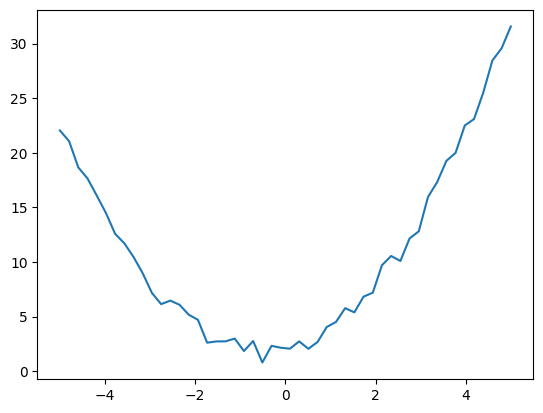

In [62]:
plt.plot(x, testdata)
